In [436]:
import os
import pandas as pd
import csv 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
import numpy as np
import matplotlib.pyplot as plt

In [443]:
# Secom Data 
secom_data = pd.read_csv("secom.data", sep = " ", header = None)

#Secom Label Data
secom_label = pd.read_csv("secom_labels.data", sep = " ", header = None)

In [448]:
# Renaming secom dataset columns into feature names 

secom_data.columns = ["feature"+ str(i+1) for i in range(len(secom_data.columns))]

In [449]:
#Count of Null Values in Entire Dataset
nullCount = secom_data.isnull().sum().sum()
print("Count of Null Values in Entire Dataset ", nullCount)

Count of Null Values in Entire Dataset  41951


In [450]:
# Correlation Matrix
corr_df = secom_data.corr()
corr_df
#Remove 0.8 and higher corr values

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
feature1,1.000000,-0.145071,0.004775,-0.007655,-0.011047,NaN,0.002281,0.031510,-0.052731,0.009052,...,-0.070137,-0.028380,0.000225,0.023469,0.019921,0.023605,0.018472,-0.025909,-0.028196,0.004177
feature2,-0.145071,1.000000,0.005802,-0.007603,-0.001641,NaN,-0.025702,-0.012084,0.031321,0.024015,...,0.073211,0.083463,0.043690,0.002905,-0.001264,0.002273,-0.009417,0.017290,0.010134,0.044834
feature3,0.004775,0.005802,1.000000,0.298935,0.095891,NaN,-0.136225,-0.273970,0.023609,0.016291,...,-0.018721,-0.010759,-0.006061,0.015711,0.018237,0.015765,-0.025548,-0.029479,-0.030943,-0.033226
feature4,-0.007655,-0.007603,0.298935,1.000000,-0.058483,NaN,-0.685835,0.138290,-0.103656,0.068998,...,-0.057051,-0.096619,0.009045,0.025461,0.024754,0.026043,0.034779,-0.039309,-0.033780,-0.081157
feature5,-0.011047,-0.001641,0.095891,-0.058483,1.000000,NaN,-0.074368,-0.916410,-0.026035,0.054619,...,-0.041290,0.088327,0.045361,-0.001301,-0.001598,-0.001617,-0.044016,-0.031145,-0.026204,0.051428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature586,0.023605,0.002273,0.015765,0.026043,-0.001617,NaN,-0.039569,0.010345,0.017930,-0.036132,...,-0.000395,-0.000673,-0.197363,0.999890,0.995342,1.000000,0.002744,-0.002931,-0.002531,-0.003801
feature587,0.018472,-0.009417,-0.025548,0.034779,-0.044016,NaN,-0.041296,0.058171,0.010436,0.033759,...,0.249926,-0.475397,-0.016726,0.002257,0.001606,0.002744,1.000000,0.167913,0.164238,-0.486559
feature588,-0.025909,0.017290,-0.029479,-0.039309,-0.031145,NaN,0.034184,-0.021472,0.022853,0.059341,...,0.975470,0.396369,-0.024481,-0.002650,-0.002498,-0.002931,0.167913,1.000000,0.974276,0.390813
feature589,-0.028196,0.010134,-0.030943,-0.033780,-0.026204,NaN,0.032359,-0.020962,0.026261,0.060803,...,1.000000,0.379167,-0.020712,-0.002261,-0.001957,-0.002531,0.164238,0.974276,1.000000,0.389211


In [451]:
# Total Datapoints on Correlation Dataset
print("Total Datapoints in correaltion matrix ",corr_df.count().sum())

Total Datapoints in correaltion matrix  224340


In [453]:
# Correlations more than 0.8 and less than -0.8

corr_df_outOfRange = corr_df[((corr_df >= 0.8) | (corr_df <= -0.8)) & (corr_df != 1.0)]

print(f"Count of Highly Correlated datapoints ( >0.8, <-0.8) =  ", corr_df_outOfRange.count().sum())

Count of Highly Correlated datapoints ( >0.8, <-0.8) =   1346


<AxesSubplot:>

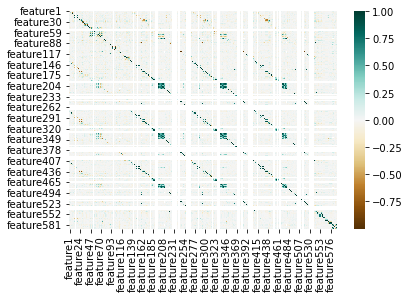

In [454]:
# Correlation Heatmap
sns.heatmap(secom_data.corr(), cmap = "BrBG")

In [455]:
# Filtered correlation within range of -0.8 to 0.8

corr_filtered = corr_df[((corr_df < 0.8) | (corr_df > -0.8))]
corr_filtered

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
feature1,1.000000,-0.145071,0.004775,-0.007655,-0.011047,NaN,0.002281,0.031510,-0.052731,0.009052,...,-0.070137,-0.028380,0.000225,0.023469,0.019921,0.023605,0.018472,-0.025909,-0.028196,0.004177
feature2,-0.145071,1.000000,0.005802,-0.007603,-0.001641,NaN,-0.025702,-0.012084,0.031321,0.024015,...,0.073211,0.083463,0.043690,0.002905,-0.001264,0.002273,-0.009417,0.017290,0.010134,0.044834
feature3,0.004775,0.005802,1.000000,0.298935,0.095891,NaN,-0.136225,-0.273970,0.023609,0.016291,...,-0.018721,-0.010759,-0.006061,0.015711,0.018237,0.015765,-0.025548,-0.029479,-0.030943,-0.033226
feature4,-0.007655,-0.007603,0.298935,1.000000,-0.058483,NaN,-0.685835,0.138290,-0.103656,0.068998,...,-0.057051,-0.096619,0.009045,0.025461,0.024754,0.026043,0.034779,-0.039309,-0.033780,-0.081157
feature5,-0.011047,-0.001641,0.095891,-0.058483,1.000000,NaN,-0.074368,-0.916410,-0.026035,0.054619,...,-0.041290,0.088327,0.045361,-0.001301,-0.001598,-0.001617,-0.044016,-0.031145,-0.026204,0.051428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature586,0.023605,0.002273,0.015765,0.026043,-0.001617,NaN,-0.039569,0.010345,0.017930,-0.036132,...,-0.000395,-0.000673,-0.197363,0.999890,0.995342,1.000000,0.002744,-0.002931,-0.002531,-0.003801
feature587,0.018472,-0.009417,-0.025548,0.034779,-0.044016,NaN,-0.041296,0.058171,0.010436,0.033759,...,0.249926,-0.475397,-0.016726,0.002257,0.001606,0.002744,1.000000,0.167913,0.164238,-0.486559
feature588,-0.025909,0.017290,-0.029479,-0.039309,-0.031145,NaN,0.034184,-0.021472,0.022853,0.059341,...,0.975470,0.396369,-0.024481,-0.002650,-0.002498,-0.002931,0.167913,1.000000,0.974276,0.390813
feature589,-0.028196,0.010134,-0.030943,-0.033780,-0.026204,NaN,0.032359,-0.020962,0.026261,0.060803,...,1.000000,0.379167,-0.020712,-0.002261,-0.001957,-0.002531,0.164238,0.974276,1.000000,0.389211


In [456]:
# Renaming the Secom Label Dataset

secom_label.rename(columns = {0:"feature1", 1:"feature2"}, inplace = True)

In [457]:
# Distribution count of Pass/Fail Status

true = secom_label[secom_label["feature1"] == 1]["feature1"].count()
false = secom_label[secom_label["feature1"] == -1]["feature1"].count()

freq = pd.DataFrame({"Status": ["Pass", "Fail"] , "Count": [false, true]})
freq

,Status,Count
0,Pass,1463
1,Fail,104


<AxesSubplot:xlabel='Status'>

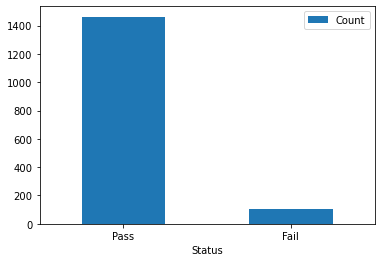

In [180]:
freq.plot.bar(x='Status', y='Count', rot = 0)

<AxesSubplot:>

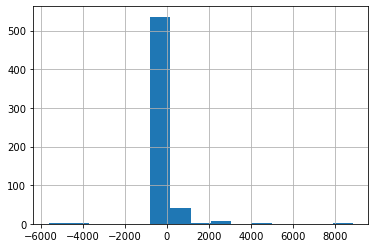

In [459]:
# Histogram of Distribution of mean

mean_hist = secom_data.mean()
mean_hist.hist(bins = 15)

In [462]:
mean_data = secom_data.mean()
mean_df = pd.DataFrame(data = mean_data, index = None)

# DataFrame of Means of each feature
mean = secom_data.mean().mean()
print("Mean of Entire Dataset ", mean)

std = secom_data.mean().std()
print("Standard deviation of entire Dataset ", std)

#Outlier
Neg_outlier = int(mean - 3*std)
Pos_outlier = int(mean + 3*std)
print("Negative Outlier limit " , Neg_outlier)
print("Positive Outlier limit " , Pos_outlier)
#Range = X+-3s

Mean of Entire Dataset  87.20997875443057
Standard deviation of entire Dataset  609.8220567563162
Negative Outlier limit  -1742
Positive Outlier limit  1916


In [468]:
# Outlier Analysis

outlier_count = mean_df[(mean_df > Pos_outlier) | (mean_df < Neg_outlier)]
print("Count of Outliers", outlier_count.count())

Count of Outliers 0    11
dtype: int64


In [465]:
# Statistical Table of Mean Dataset
mean_data.describe()

count     590.000000
mean       87.209979
std       609.822057
min     -5618.393610
25%         0.001578
50%         0.761510
75%        10.135639
max      8827.536865
dtype: float64

In [466]:
# Count of Datapoints within Outlier Limit
main_df = mean_df[(mean_df < Pos_outlier) & (mean_df > Neg_outlier)]
print("Count of Datapoints within Outlier Limit ", main_df.count())

Count of Datapoints within Outlier Limit  0    579
dtype: int64


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

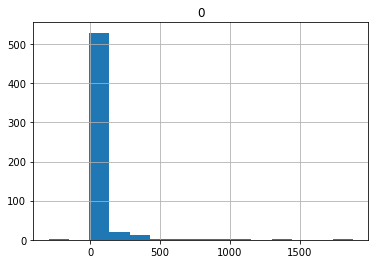

In [470]:
# DIstribution of Data without Outliers
main_df.hist(bins = 15)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

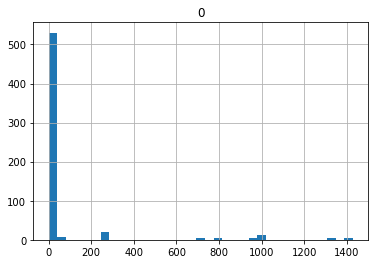

In [475]:
# Null Values outlier limit

secom_null = secom_data.isna().sum()
secom_null_df = pd.DataFrame(data = secom_null, columns = ["Missing Value"])
nullMean = secom_null_df.mean()
nullStd = secom_null_df.std()
pos1 = nullMean + 3*nullStd
neg1 = nullMean - 3*nullStd
print("Postive outlier limit", pos1)
print("Negative outlier limit", neg1)

Postive outlier limit Missing Value    796.655083
dtype: float64
Negative outlier limit Missing Value   -654.448304
dtype: float64


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

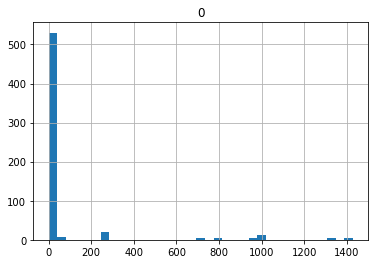

In [476]:
# Distribution of Null Values
null_value = secom_data.isna().sum()
null_hist = pd.DataFrame(data= null_value)
null_hist.hist(bins = 35)

In [477]:
# Count of Missing values outside outlier limit
null_df = secom_null_df[(secom_null_df > pos1) | (secom_null_df < neg1)]
null_df.dropna()
print("Count of missing values outside outlier range ", null_df.count())

Count of missing values outside outlier range  Missing Value    24
dtype: int64


In [351]:
# Time series Analysis, spliting timestamp

df2[["date","time"]] = df2[1].str.split(" ", expand = True)

Text(0.5, 1.0, 'Time-Series Analysis')

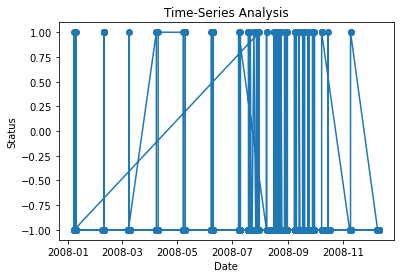

In [379]:
plt.plot(df2["Status"], marker = "o")
plt.xlabel("Date")
plt.ylabel("Status")
plt.title("Time-Series Analysis")

Text(0.5, 1.0, 'Time-Series Analysis')

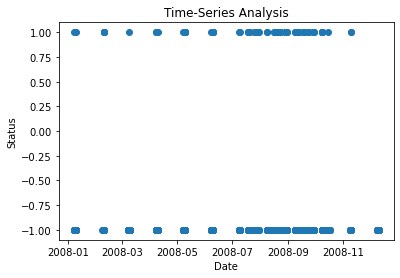

In [381]:
plt.scatter(df2.index, df2["Status"])
plt.xlabel("Date")
plt.ylabel("Status")
plt.title("Time-Series Analysis")